# Course 2: Data Science with Python

# Task 3: Build and Evaluate Models

## Credit One Regression

## 1. Selecting and Dividing the Data

In [1]:
#Imports
#Numpy, pandas, scify, math, matplotlib
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pydotplus
import graphviz
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#SKLearn, need to specify where the function "lives" before importing it
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Import other classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#from sklearn.datasets import load_digits
#from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

from sklearn.tree import export_text

#Helpers

%matplotlib inline

# Import the Data

In [2]:
#Import CSV file after Pre-Processing
rawData = pd.read_csv('credit_t3.csv')
rawData.head()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,age_cut,LIMIT_BAL_cut,PAY_SCORE,BILL_AMT1_cut,BILL_AMT6_cut,PAY_AMT6_cut,PAY_AMT6_cut2,PAY_AMT1_cut2,BILL_AMT1_cut2,PAY_AMT1_cut
0,0,1,20000,1,24,2,2,-1,-1,-2,...,20,0,-2,0,0,0,0,0,0,0
1,1,2,120000,2,26,-1,2,0,0,0,...,20,100,3,0,0,0,0,0,0,0
2,2,3,90000,2,34,0,0,0,0,0,...,30,0,0,0,0,0,0,0,20,0
3,3,4,50000,1,37,0,0,0,0,0,...,30,0,0,0,0,0,0,0,40,0
4,4,5,50000,1,57,-1,0,-1,0,0,...,50,0,-2,0,0,0,0,0,0,0


In [3]:
#Examine the structure of your data and ensure everything was imported in the 
#format you need for work.

rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Unnamed: 0                              30000 non-null  int64 
 1   ID                                      30000 non-null  int64 
 2   LIMIT_BAL                               30000 non-null  int64 
 3   MARRIAGE                                30000 non-null  int64 
 4   AGE                                     30000 non-null  int64 
 5   PAY_0                                   30000 non-null  int64 
 6   PAY_2                                   30000 non-null  int64 
 7   PAY_3                                   30000 non-null  int64 
 8   PAY_4                                   30000 non-null  int64 
 9   PAY_5                                   30000 non-null  int64 
 10  PAY_6                                   30000 non-null  int64 
 11  BI

# Selecting the Data

# Regression Models

In [4]:
#Lets select the features and the dependent variable:

#1. Select the features (you should now have determined a final set of features to be 
#used in your analysis after studying the correlation and covariance of the data):

#features
X = rawData.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,27,28,29,30,31,32]]
print('Summary of feature sample')
X.head


Summary of feature sample


<bound method NDFrame.head of        MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0             1   24      2      2     -1     -1     -2     -2       3913   
1             2   26     -1      2      0      0      0      2       2682   
2             2   34      0      0      0      0      0      0      29239   
3             1   37      0      0      0      0      0      0      46990   
4             1   57     -1      0     -1      0      0      0       8617   
...         ...  ...    ...    ...    ...    ...    ...    ...        ...   
29995         1   39      0      0      0      0      0      0     188948   
29996         2   43     -1     -1     -1     -1      0      0       1683   
29997         2   37      4      3      2     -1      0      0       3565   
29998         1   41      1     -1      0      0      0     -1      -1645   
29999         1   46      0      0      0      0      0      0      47929   

       BILL_AMT2  ...  PAY_AMT4  PAY_AMT5  PA

In [5]:
#2. Select the Dependent Variable (Remember - this is just for this example; 
#your final model might need to use something different):

#dependent variable
y = rawData['LIMIT_BAL']

# 2. Building the Models and Choosing the Right Model 

In [6]:
#Again while not mandatory, but it might be a good idea to validate that the 
#correct column is being used for the dependent variable:

#dependent variable
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [7]:
#Modeling Format:

#1. Lets go ahead and prepare each regression algorithm for use just as we did in course one

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [8]:
#2. To build and assess both models recursively, 
#we create an empty list to store the results and another to 
#hold the name of each algorithm so we can easily print out the results 
#and keep them separated as follows:

#regression
results = []
names = []

for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

# Evaluating Model Performance

In [9]:
#Here is the output:

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4682712057923257
Linear Regression 0.3581989426610758
Support Vector Regression -0.050380094472762


### TRAIN/TEST - Random Forest Regressor

In [10]:
#3. Use the model variables you established in step 2, 
#pass the training data to it in the following format (you'll need to use train_test_split prior):

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [11]:
#Modeling 
#Choose your algorithm
rfr1 = RandomForestRegressor()
#model name
rfrFit1 = rfr1.fit(X_train,y_train)

#Predictions
rfrpreds = rfrFit1.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.470
RMSE: 93711.009


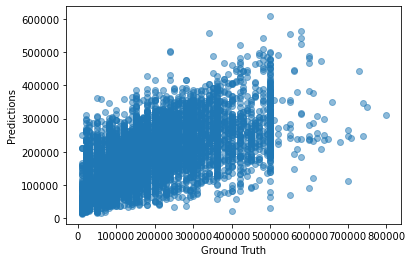

In [12]:
plt.scatter(y_test, rfrpreds, alpha= 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

### TRAIN/TEST - Linear Regression

In [13]:
#3. Use the model variables you established in step 2, 
#pass the training data to it in the following format (you'll need to use train_test_split prior):

#Train/Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
lr1 = LinearRegression()
#model name
lr1Fit1 = lr1.fit(X_train,y_train)

#Predictins
lr1preds = lr1Fit1.predict(X_test)
predRsquared = r2_score(y_test,lr1preds)
rmse = sqrt(mean_squared_error(y_test, lr1preds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.360
RMSE: 102975.437


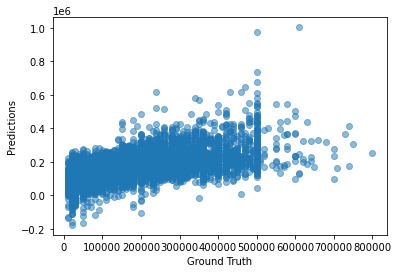

In [14]:
plt.scatter(y_test, lr1preds, alpha= 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

# Trying different Features - Random Forest Regression

In [15]:
#Dependent Variable
y = rawData['LIMIT_BAL']

#Change Features
X = rawData.iloc[:,[4,5,10,11,16,17,22,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr1 = RandomForestRegressor()
#model name
rfrFit1 = rfr1.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit1.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

Summary of feature sample
R Squared: 0.425
RMSE: 97603.505


In [16]:
#Dependent Variable
y = rawData['LIMIT_BAL']

#Change Features
X = rawData.iloc[:,[5,10,11,16,17,22,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr2 = RandomForestRegressor()
#model name
rfrFit2 = rfr2.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit2.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

Summary of feature sample
R Squared: 0.371
RMSE: 102026.484


In [17]:
#Dependent Variable
y = rawData['LIMIT_BAL']

#Change Features
X = rawData.iloc[:,[4,5,11,17,32]]
#print('Summary of feature sample')
#X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr3 = RandomForestRegressor()
#model name
rfrFit3 = rfr3.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit3.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.344
RMSE: 104245.531


In [18]:
#Dependent Variable
y = rawData['LIMIT_BAL']

#Change Features
X = rawData.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,27,28,29,30,31,32]]
#print('Summary of feature sample')
#X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling 
#Choose your algorithm
rfr4 = RandomForestRegressor()
#model name
rfrFit4 = rfr4.fit(X_train,y_train)

#Predictins
rfrpreds = rfrFit4.predict(X_test)
predRsquared = r2_score(y_test,rfrpreds)
rmse = sqrt(mean_squared_error(y_test, rfrpreds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.424
RMSE: 97679.100


# Switch to Classification Model

In [19]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Unnamed: 0                              30000 non-null  int64 
 1   ID                                      30000 non-null  int64 
 2   LIMIT_BAL                               30000 non-null  int64 
 3   MARRIAGE                                30000 non-null  int64 
 4   AGE                                     30000 non-null  int64 
 5   PAY_0                                   30000 non-null  int64 
 6   PAY_2                                   30000 non-null  int64 
 7   PAY_3                                   30000 non-null  int64 
 8   PAY_4                                   30000 non-null  int64 
 9   PAY_5                                   30000 non-null  int64 
 10  PAY_6                                   30000 non-null  int64 
 11  BI

# Model Variation - Use LIMIT_BAL_CUT as the dependent variable 

In [20]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

0      0
1    100
2      0
3      0
4      0
Name: LIMIT_BAL_cut, dtype: int64

In [21]:
#Feature Options
X = rawData.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,27,28,29,30,31]]

In [22]:
algos_Class = []

algos_Class.append(('Random Forest Classifier', RandomForestClassifier(max_depth=3)))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=3)))
algos_Class.append(('K Neighbors Classifier',  KNeighborsClassifier()))
algos_Class.append(('MLP Classifier', MLPClassifier()))
algos_Class.append(('AdaBoost Classifier', AdaBoostClassifier()))
algos_Class.append(('Gaussian NB Classifier', GaussianNB()))

                   
print(algos_Class)

[('Random Forest Classifier', RandomForestClassifier(max_depth=3)), ('Decision Tree Classifier', DecisionTreeClassifier(max_depth=3)), ('K Neighbors Classifier', KNeighborsClassifier()), ('MLP Classifier', MLPClassifier()), ('AdaBoost Classifier', AdaBoostClassifier()), ('Gaussian NB Classifier', GaussianNB())]


In [23]:
#classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)


C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least popula

In [24]:
for i in range(len(names)):
        print(names[i],results[i].mean())

Random Forest Classifier 0.5266333333333333
Decision Tree Classifier 0.5215
K Neighbors Classifier 0.5119333333333334
MLP Classifier 0.35990000000000005
AdaBoost Classifier 0.3316
Gaussian NB Classifier 0.45836666666666664


In [25]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [26]:
dtc1 = DecisionTreeClassifier(max_depth=3)
dtcFit1 = dtc1.fit(X_train,y_train)

#Predictions
dtc1preds = dtcFit1.predict(X_test)

print(classification_report(y_test, dtc1preds))


              precision    recall  f1-score   support

           0       0.65      0.82      0.72      3467
         100       0.42      0.49      0.45      2172
         200       0.41      0.42      0.41      1881
         300       0.41      0.09      0.15       871
         400       0.00      0.00      0.00       342
         500       0.00      0.00      0.00       234
         600       0.00      0.00      0.00        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.53      9000
   macro avg       0.21      0.20      0.19      9000
weighted avg       0.48      0.53      0.49      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


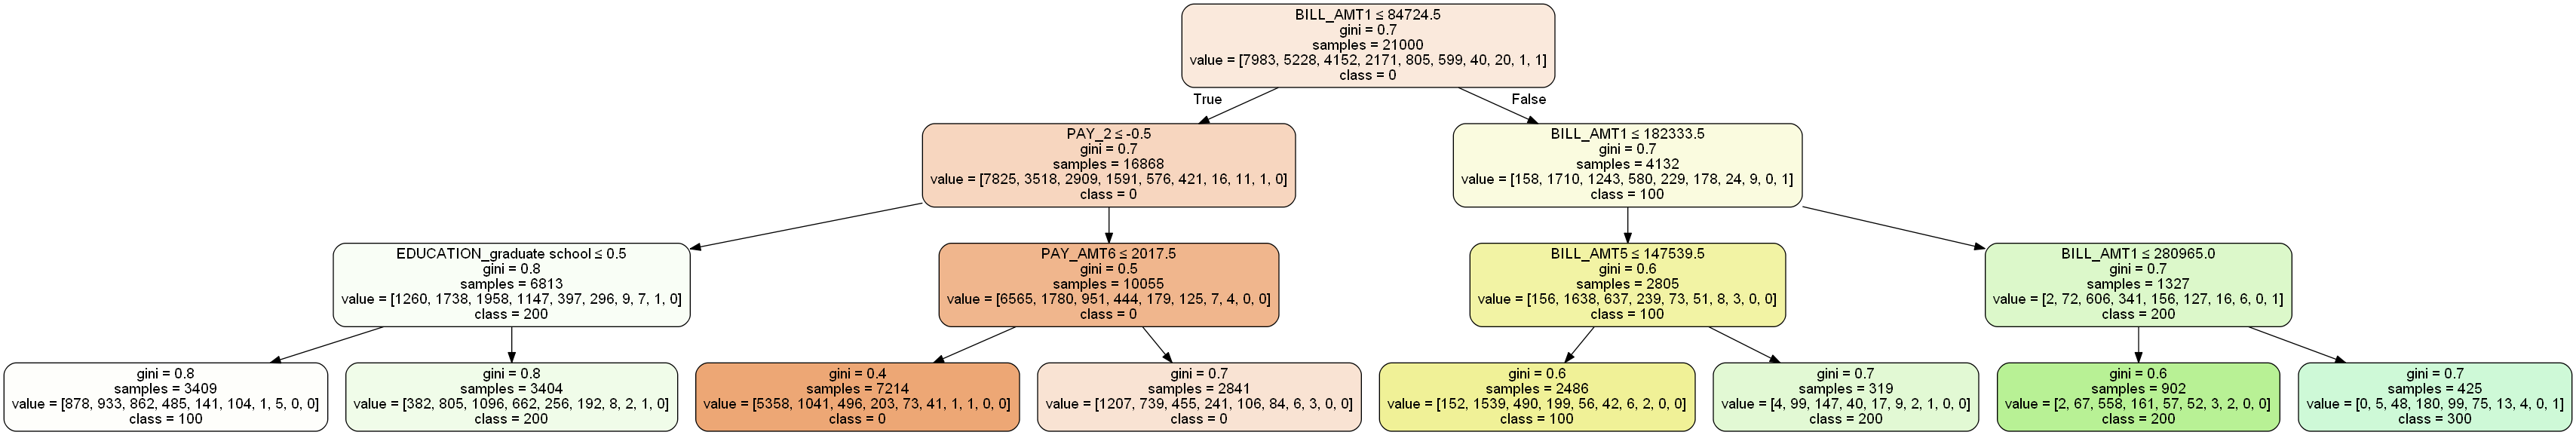

In [27]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit1, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['0','100','200','300','400','500','600','700','800'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

# Change a Few Features

In [28]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 2
X = rawData.iloc[:,[11-23, 32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc2 = DecisionTreeClassifier()
dtcFit2 = dtc1.fit(X_train,y_train)

#Predictions
dtc2preds = dtcFit2.predict(X_test)

print(classification_report(y_test, dtc2preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.39      1.00      0.56      3467
         100       0.00      0.00      0.00      2172
         200       0.00      0.00      0.00      1881
         300       0.00      0.00      0.00       871
         400       0.00      0.00      0.00       342
         500       0.00      0.00      0.00       234
         600       0.00      0.00      0.00        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.39      9000
   macro avg       0.04      0.11      0.06      9000
weighted avg       0.15      0.39      0.21      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 4
X = rawData.iloc[:,[32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc4 = DecisionTreeClassifier()
dtcFit4 = dtc4.fit(X_train,y_train)

#Predictions
dtc4preds = dtcFit4.predict(X_test)

print(classification_report(y_test, dtc4preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.39      1.00      0.56      3467
         100       0.00      0.00      0.00      2172
         200       0.00      0.00      0.00      1881
         300       0.00      0.00      0.00       871
         400       0.00      0.00      0.00       342
         500       0.00      0.00      0.00       234
         600       0.00      0.00      0.00        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.39      9000
   macro avg       0.04      0.11      0.06      9000
weighted avg       0.15      0.39      0.21      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#Dependent Variable
y = rawData['LIMIT_BAL_cut']
y.head()

#Feature Selection Option 4
X = rawData.iloc[:,[11,12,13,14,15,16,17,18,19,20,21,22,28,32]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc5 = DecisionTreeClassifier()
dtcFit5 = dtc5.fit(X_train,y_train)

#Predictions
dtc5preds = dtcFit5.predict(X_test)

print(classification_report(y_test, dtc5preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      3467
         100       0.37      0.39      0.38      2172
         200       0.34      0.32      0.33      1881
         300       0.18      0.19      0.19       871
         400       0.10      0.11      0.11       342
         500       0.12      0.12      0.12       234
         600       0.00      0.00      0.00        24
         700       0.00      0.00      0.00         8
         800       0.00      0.00      0.00         1

    accuracy                           0.44      9000
   macro avg       0.20      0.20      0.20      9000
weighted avg       0.44      0.44      0.44      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# # Model Variation - Change Dependent Variable to Default

In [31]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options
X = rawData.iloc[:,[2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,27,28,29,30,31]]
print('Summary of feature sample')
X.head


Summary of feature sample


<bound method NDFrame.head of        LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0          20000      2      2     -1     -1     -2     -2       3913   
1         120000     -1      2      0      0      0      2       2682   
2          90000      0      0      0      0      0      0      29239   
3          50000      0      0      0      0      0      0      46990   
4          50000     -1      0     -1      0      0      0       8617   
...          ...    ...    ...    ...    ...    ...    ...        ...   
29995     220000      0      0      0      0      0      0     188948   
29996     150000     -1     -1     -1     -1      0      0       1683   
29997      30000      4      3      2     -1      0      0       3565   
29998      80000      1     -1      0      0      0     -1      -1645   
29999      50000      0      0      0      0      0      0      47929   

       BILL_AMT2  BILL_AMT3  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0           3102 

In [32]:
algos_Class = []

algos_Class.append(('Random Forest Classifier', RandomForestClassifier(max_depth=3)))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=3)))
algos_Class.append(('K Neighbors Classifier',  KNeighborsClassifier()))
algos_Class.append(('MLP Classifier', MLPClassifier()))
algos_Class.append(('AdaBoost Classifier', AdaBoostClassifier()))
algos_Class.append(('Gaussian NB Classifier', GaussianNB()))
                   
print(algos_Class)

[('Random Forest Classifier', RandomForestClassifier(max_depth=3)), ('Decision Tree Classifier', DecisionTreeClassifier(max_depth=3)), ('K Neighbors Classifier', KNeighborsClassifier()), ('MLP Classifier', MLPClassifier()), ('AdaBoost Classifier', AdaBoostClassifier()), ('Gaussian NB Classifier', GaussianNB())]


In [33]:
#classification
results = []
names = []
    
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [34]:
for i in range(len(names)):
        print(names[i],results[i].mean())

Random Forest Classifier 0.8112
Decision Tree Classifier 0.8201666666666667
K Neighbors Classifier 0.7531666666666667
MLP Classifier 0.7214
AdaBoost Classifier 0.8165666666666667
Gaussian NB Classifier 0.3796


In [35]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


In [36]:
dtc7 = DecisionTreeClassifier(max_depth=3)
dtcFit7 = dtc7.fit(X_train,y_train)

#Predictions
dtc7preds = dtcFit7.predict(X_test)

print(classification_report(y_test, dtc7preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.65      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



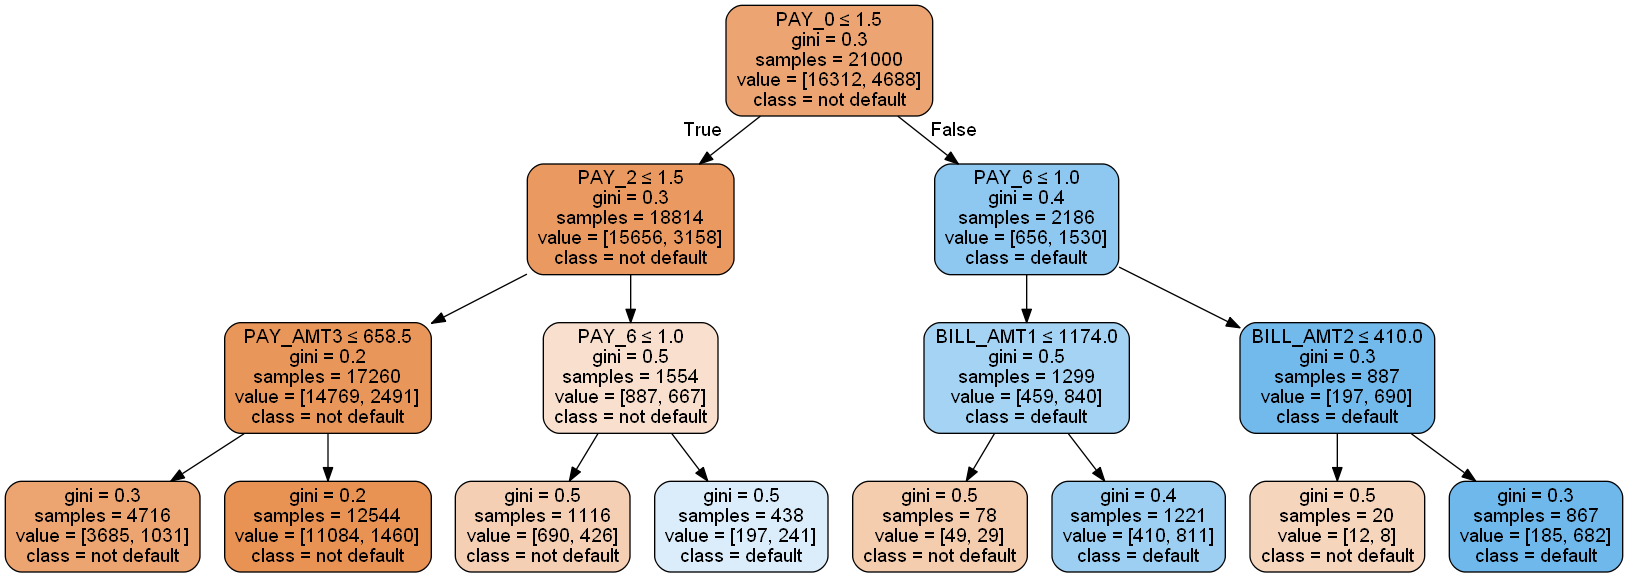

In [37]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit7, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [38]:
text = export_text(dtc7, show_weights=True, feature_names= X.columns.tolist())
print(text)

|--- PAY_0 <= 1.50
|   |--- PAY_2 <= 1.50
|   |   |--- PAY_AMT3 <= 658.50
|   |   |   |--- weights: [3685.00, 1031.00] class: 0
|   |   |--- PAY_AMT3 >  658.50
|   |   |   |--- weights: [11084.00, 1460.00] class: 0
|   |--- PAY_2 >  1.50
|   |   |--- PAY_6 <= 1.00
|   |   |   |--- weights: [690.00, 426.00] class: 0
|   |   |--- PAY_6 >  1.00
|   |   |   |--- weights: [197.00, 241.00] class: 1
|--- PAY_0 >  1.50
|   |--- PAY_6 <= 1.00
|   |   |--- BILL_AMT1 <= 1174.00
|   |   |   |--- weights: [49.00, 29.00] class: 0
|   |   |--- BILL_AMT1 >  1174.00
|   |   |   |--- weights: [410.00, 811.00] class: 1
|   |--- PAY_6 >  1.00
|   |   |--- BILL_AMT2 <= 410.00
|   |   |   |--- weights: [12.00, 8.00] class: 0
|   |   |--- BILL_AMT2 >  410.00
|   |   |   |--- weights: [185.00, 682.00] class: 1



# Try Different Features

In [39]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 2
X = rawData.iloc[:,[4,5,10,11,16,17,22,35]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc8 = DecisionTreeClassifier()
dtcFit8 = dtc8.fit(X_train,y_train)

#Predictions
dtc8preds = dtcFit8.predict(X_test)

print(classification_report(y_test, dtc8preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7052
           1       0.37      0.41      0.39      1948

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.73      9000



In [40]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 4
X = rawData.iloc[:,[17,35]]

print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc10 = DecisionTreeClassifier()
dtcFit10 = dtc10.fit(X_train,y_train)

#Predictions
dtc10preds = dtcFit10.predict(X_test)

print(classification_report(y_test, dtc10preds))


Summary of feature sample
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      7052
           1       0.18      0.07      0.10      1948

    accuracy                           0.73      9000
   macro avg       0.48      0.49      0.47      9000
weighted avg       0.65      0.73      0.68      9000



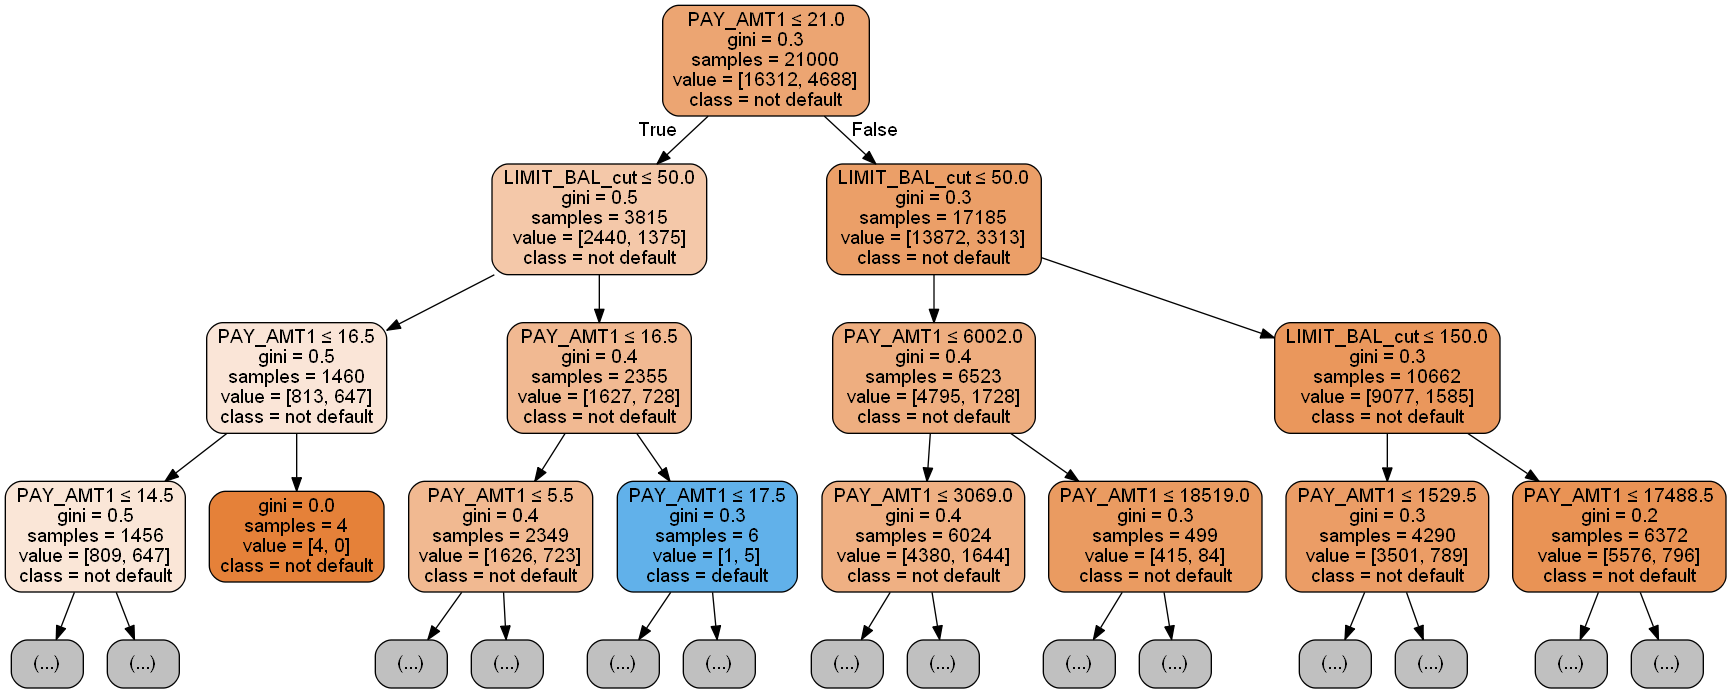

In [41]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit10, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [42]:
#Dependent Variable
y = rawData['default payment next month_default']
y.head()

#Feature Options 5
X = rawData.iloc[:,[3,4,26,27,28,29,30,31]]
print('Summary of feature sample')
X.head

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc11 = DecisionTreeClassifier(max_depth=3)
dtcFit11 = dtc11.fit(X_train,y_train)

#Predictions
dtc11preds = dtcFit11.predict(X_test)

print(classification_report(y_test, dtc11preds))

Summary of feature sample
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       0.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


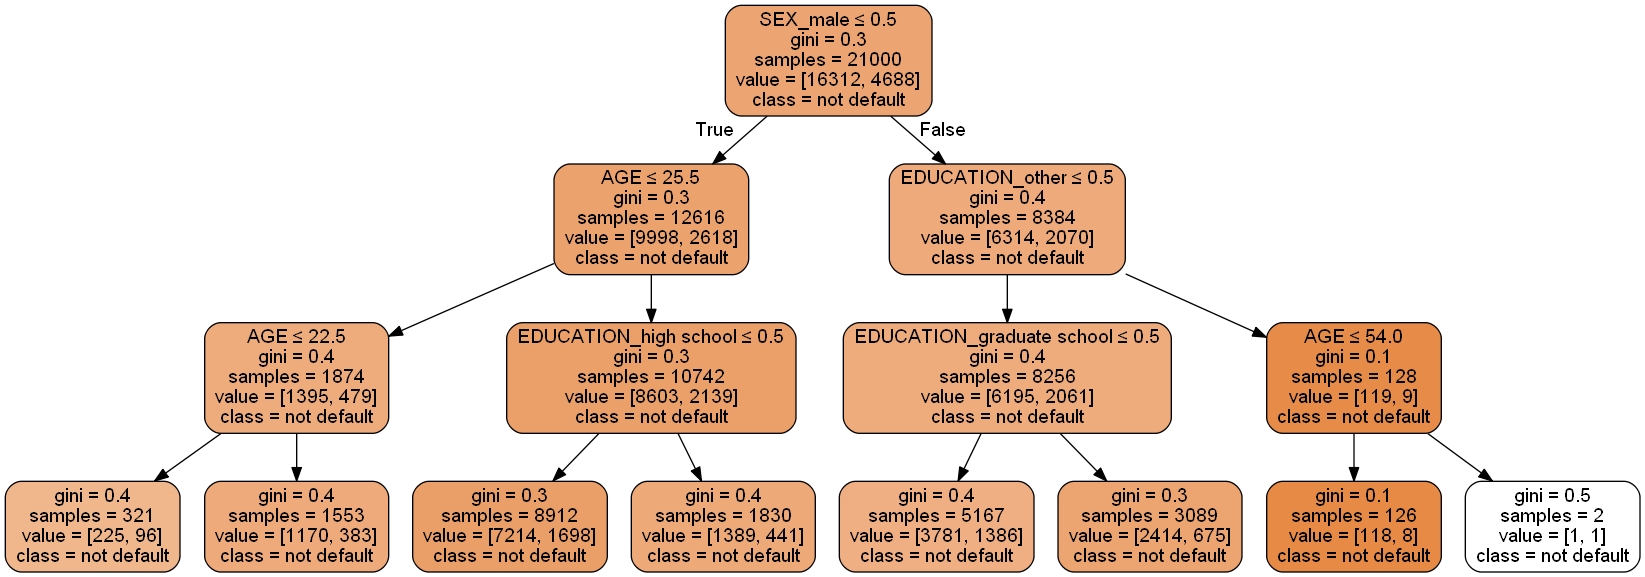

In [43]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit11, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['not default','default'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [44]:
text = export_text(dtc11, show_weights=True, feature_names= X.columns.tolist())
print(text)

|--- SEX_male <= 0.50
|   |--- AGE <= 25.50
|   |   |--- AGE <= 22.50
|   |   |   |--- weights: [225.00, 96.00] class: 0
|   |   |--- AGE >  22.50
|   |   |   |--- weights: [1170.00, 383.00] class: 0
|   |--- AGE >  25.50
|   |   |--- EDUCATION_high school <= 0.50
|   |   |   |--- weights: [7214.00, 1698.00] class: 0
|   |   |--- EDUCATION_high school >  0.50
|   |   |   |--- weights: [1389.00, 441.00] class: 0
|--- SEX_male >  0.50
|   |--- EDUCATION_other <= 0.50
|   |   |--- EDUCATION_graduate school <= 0.50
|   |   |   |--- weights: [3781.00, 1386.00] class: 0
|   |   |--- EDUCATION_graduate school >  0.50
|   |   |   |--- weights: [2414.00, 675.00] class: 0
|   |--- EDUCATION_other >  0.50
|   |   |--- AGE <= 54.00
|   |   |   |--- weights: [118.00, 8.00] class: 0
|   |   |--- AGE >  54.00
|   |   |   |--- weights: [1.00, 1.00] class: 0

